# Importing Requisite Libraries

In [42]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Model evaluation and validation
from sklearn.model_selection import cross_val_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [43]:
#load the dataset
play=pd.read_csv("D:/Exercises and Datasources/Datasets/google play store/googleplaystore.csv")

In [44]:
play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [45]:
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**The googleplaystore.csv dataset contains the following columns:**

1. App: Name of the application.
2. Category: Category under which the app falls.
3. Rating: Overall user rating of the app.
4. Reviews: Number of user reviews.
5. Size: Size of the app.
6. Installs: Number of user downloads/installs.
7. Type: Paid or Free.
8. Price: Price of the app.
8. Content Rating: Age group the app is targeted at.
10. Genres: Genres of the app.
11. Last Updated: Date when the app was last updated.
12. Current Ver: Current version of the app.
13. Android Ver: Minimum Android version required.

In [46]:
play.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Number of missing values in each column**

Rating: 1,474 missing values.

Type: 1 missing value.

Content Rating: 1 missing value.

Current Ver: 8 missing values.

Android Ver: 3 missing values

In [47]:
play.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

**All the Columns are of type Object. This needs alot of type conversions**

**Looking for duplicates**

In [48]:
duplicates_playstore = play.duplicated().sum()
duplicates_playstore

483

In googleplaystore.csv, there are 483 duplicate entries.

# Handling Duplicates:

I'll remove all duplicate entries from  dataset to ensure the uniqueness of each record.

In [49]:
# Handling duplicates
play = play.drop_duplicates()
play.shape

(10358, 13)

Printing all the unique values from Categorical colummns having Categories less than 10

In [50]:
for col in play:
    if play[col].nunique()<10:
        nuni_cats=play[col].unique()
        print('--------------------------')
        print(f'Uniques in {col} are {nuni_cats}')

--------------------------
Uniques in Type are ['Free' 'Paid' nan '0']
--------------------------
Uniques in Content Rating are ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]


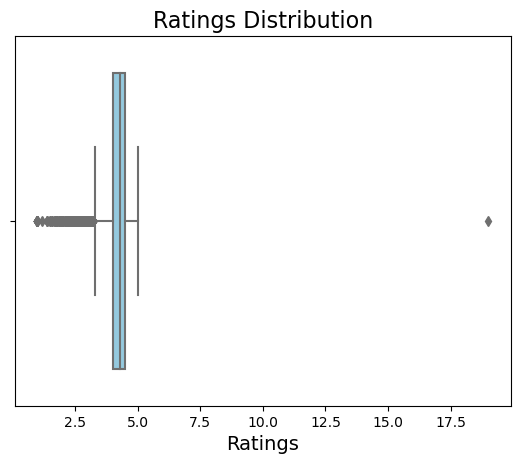

In [51]:
#diving deep into Rating columns
# Creating a box plot with custom color
sns.boxplot(data=play,x='Rating', color='skyblue')

# Adding title and labels
plt.title("Ratings Distribution", fontsize=16)
plt.xlabel("Ratings", fontsize=14)
plt.show()


There is an outlier in Rating of value 19.0 which is outside the ratings range of 1-5.Setting its value to Maximum value i.e 5

In [52]:
# Assign a value based on a condition
play.loc[play['Rating'] > 5, 'Rating'] =5.0



Plotting Boxplot again to see Distribution after outlier removing

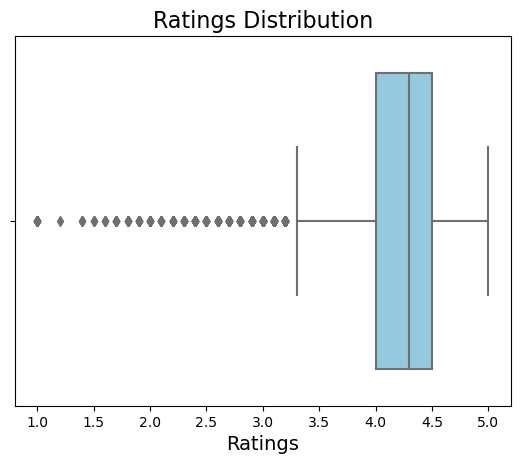

In [53]:
#diving deep into Rating columns
# Creating a box plot with custom color
sns.boxplot(data=play,x='Rating', color='skyblue')

# Adding title and labels
plt.title("Ratings Distribution", fontsize=16)
plt.xlabel("Ratings", fontsize=14)
plt.show()


**Identifying a strange Sample where all features are Wrong**

In [54]:
play.loc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                5.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

This column has all of the values in the wrong place, deleting this row from the data set

In [55]:
play.drop(10472,inplace=True)

In [56]:
play.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Deleting the above column removed Null from Content Rating Column too

# Handling Missing Values

Rating:

Since this is our target variable for prediction, we shouldn't impute missing values. We'll remove rows with missing ratings.

Type, Content Rating, Current Ver, Android Ver:

Given the small number of missing values, these rows will be removed to maintain data integrity.

In [57]:
play = play.dropna(subset=['Rating', 'Type',  'Current Ver', 'Android Ver'])


In [58]:
play.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

The Problem of Missing Values is solved

**Type Conversion**

Investigating Genres Column

In [61]:
play['Genres'][0:10]

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
5                 Art & Design
6                 Art & Design
7                 Art & Design
8                 Art & Design
9      Art & Design;Creativity
Name: Genres, dtype: object

Extracting main Category from the Genres Column

In [62]:
# Extract the initial names before semicolons
play['Genres'] = play['Genres'].str.split(';').str.get(0)

In [64]:
play['Genres'][0:10]

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
5    Art & Design
6    Art & Design
7    Art & Design
8    Art & Design
9    Art & Design
Name: Genres, dtype: object

Investigating Price Column

In [65]:
play['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

Removing Dollar sign and converting to Integer type

In [66]:
 play['Price'] = pd.to_numeric(play['Price'].str.replace('$', ''), errors='coerce')

Converting Reviews to integer

In [67]:
play['Reviews']=pd.to_numeric(play['Reviews'])

Imputing Size where Size is Varies with device to mean size after Standardizing the size to Mbs

In [68]:
# Function to convert size values to numeric
def convert_size_to_numeric(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1024  # Convert MB to KB
    elif 'k' in size:
        return float(size.replace('k', ''))
    else:
        return None  # Handle 'Varies with device' or other cases

# Apply the function to the 'Size' column
play['Size'] = play['Size'].apply(convert_size_to_numeric)

In [69]:
play['Size'].isnull().sum()

1468

There were 1468 Samples with values 'Varies with Device'

In [70]:
play['Size'].median()

14336.0

In [71]:
play['Size'].fillna(play['Size'].median(),inplace=True)

In [72]:
play['Size'].isnull().sum()

0

**Removing + Sign from the Installs**

In [73]:
# Function to convert installs values to numeric
def convert_installs_to_numeric(installs):
    return int(installs.replace(',', '').replace('+', ''))

# Apply the function to the 'Installs' column
play['Installs'] = play['Installs'].apply(convert_installs_to_numeric)



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000,Free,0.0,Everyone,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2662.4,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,54272.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3686.4,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,14336.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [74]:
play.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [75]:
play.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Encoding Categorical Columns

In [76]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode categorical features
label_encoder = LabelEncoder()
categorical_features = ['Category', 'Type', 'Content Rating', 'Genres']
for feature in categorical_features:
    play[feature] = label_encoder.fit_transform(play[feature])

In [81]:
play[0:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19456.0,10000,0,0.0,1,3,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,0,3.9,967,14336.0,500000,0,0.0,1,3,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8908.8,5000000,0,0.0,1,3,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,0,4.5,215644,25600.0,50000000,0,0.0,4,3,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2867.2,100000,0,0.0,1,3,"June 20, 2018",1.1,4.4 and up


# Play Store Reviews data 

In [82]:
#load data
reviews=pd.read_csv("D:/Exercises and Datasources/Datasets/google play store/googleplaystore_user_reviews.csv")

In [83]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


**The dataset contains the following columns:**

App:Name of the application.

Translated_Review:User review text (translated).

Sentiment:Sentiment of the review (Positive, Negative, Neutral).

Sentiment_Polarity:Numerical score representing sentiment polarity.

Sentiment_Subjectivity:Numerical score representing how subjective the review is.

**Missing Values**

In [84]:
reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

**Duplicates**

In [85]:
reviews.duplicated().sum()

33616

**Data Clean Up**

In [87]:
# Handling missing values 
# Dropping rows where 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity' are missing
reviews = reviews.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])

# Handling duplicates in googleplaystore_user_reviews.csv
reviews = reviews.drop_duplicates()

# New shape of the dataset
reviews_shape = reviews.shape

reviews_shape


(29692, 5)

**Aggregating the data by APP**

In [88]:
# Aggregating review data by app
reviews = reviews.groupby('App').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean'
}).reset_index()

# Display the aggregated review data
reviews.head()

,App,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,0.465906,0.493254
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.358227,0.508907
2,11st,0.185943,0.455340
3,1800 Contacts - Lens Store,0.318145,0.591098
4,1LINE – One Line with One Touch,0.196290,0.557315


# Merging the datasets

In [89]:
# Merging the preprocessed play store data with the aggregated review data on the 'App' column
merged_data = pd.merge(play, reviews, on='App', how='left')

In [90]:
merged_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19456.0,10000,0,0.0,1,3,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN
1,Coloring book moana,0,3.9,967,14336.0,500000,0,0.0,1,3,"January 15, 2018",2.0.0,4.0.3 and up,0.117917,0.645694
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8908.8,5000000,0,0.0,1,3,"August 1, 2018",1.2.4,4.0.3 and up,NaN,NaN
3,Sketch - Draw & Paint,0,4.5,215644,25600.0,50000000,0,0.0,4,3,"June 8, 2018",Varies with device,4.2 and up,NaN,NaN
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2867.2,100000,0,0.0,1,3,"June 20, 2018",1.1,4.4 and up,NaN,NaN


In [91]:
merged_data.isnull().sum()

App                          0
Category                     0
Rating                       0
Reviews                      0
Size                         0
Installs                     0
Type                         0
Price                        0
Content Rating               0
Genres                       0
Last Updated                 0
Current Ver                  0
Android Ver                  0
Sentiment_Polarity        7808
Sentiment_Subjectivity    7808
dtype: int64

In [92]:
# Handling any missing values in the merged dataset after aggregation (filling with 0)
merged_data['Sentiment_Polarity'].fillna(0, inplace=True)
merged_data['Sentiment_Subjectivity'].fillna(0, inplace=True)

Missing sentiment values were filled with 0, assuming no sentiment data implies neutral sentiment.

# Exploratory Data Analysis

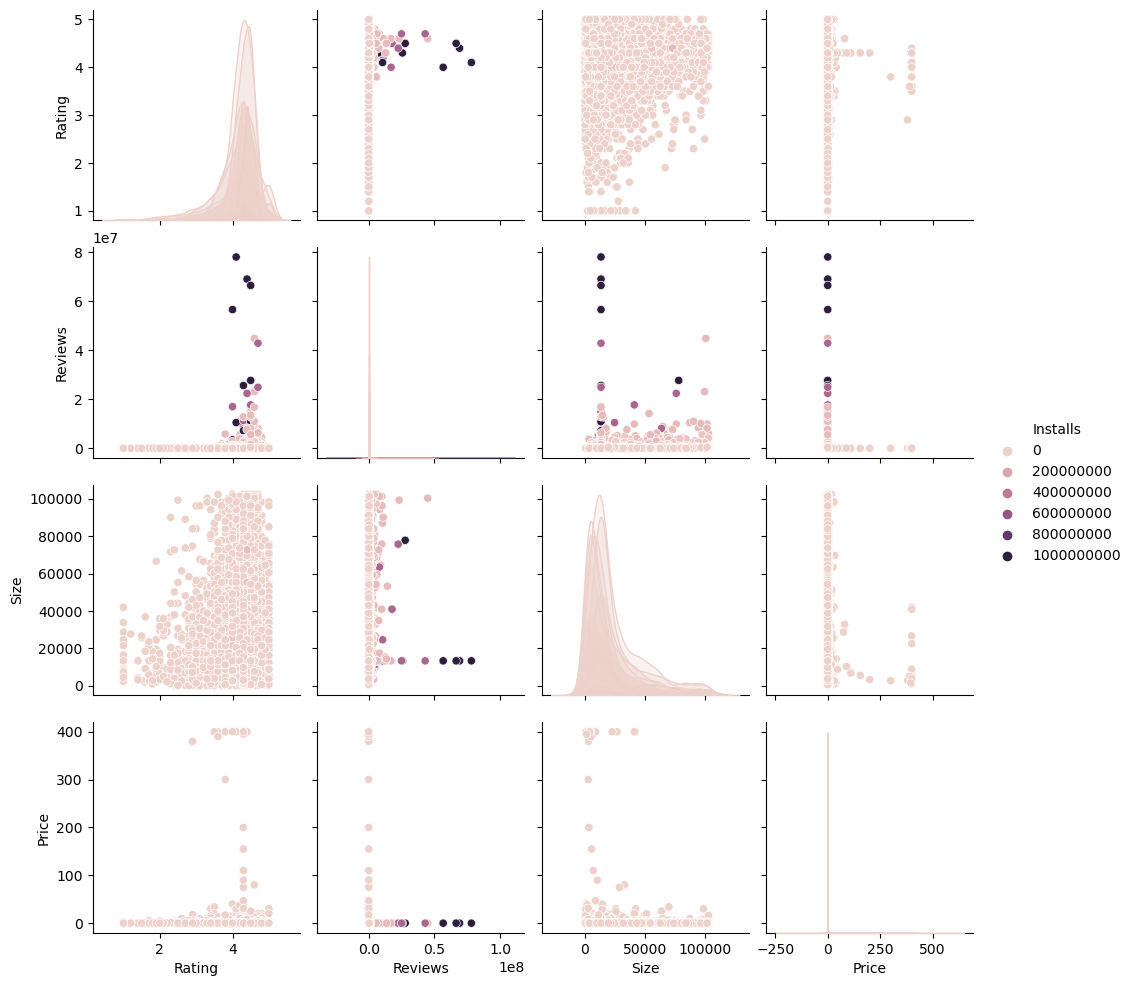

In [45]:
sns.pairplot(play,hue='Installs')

# Uni Variate Analysis

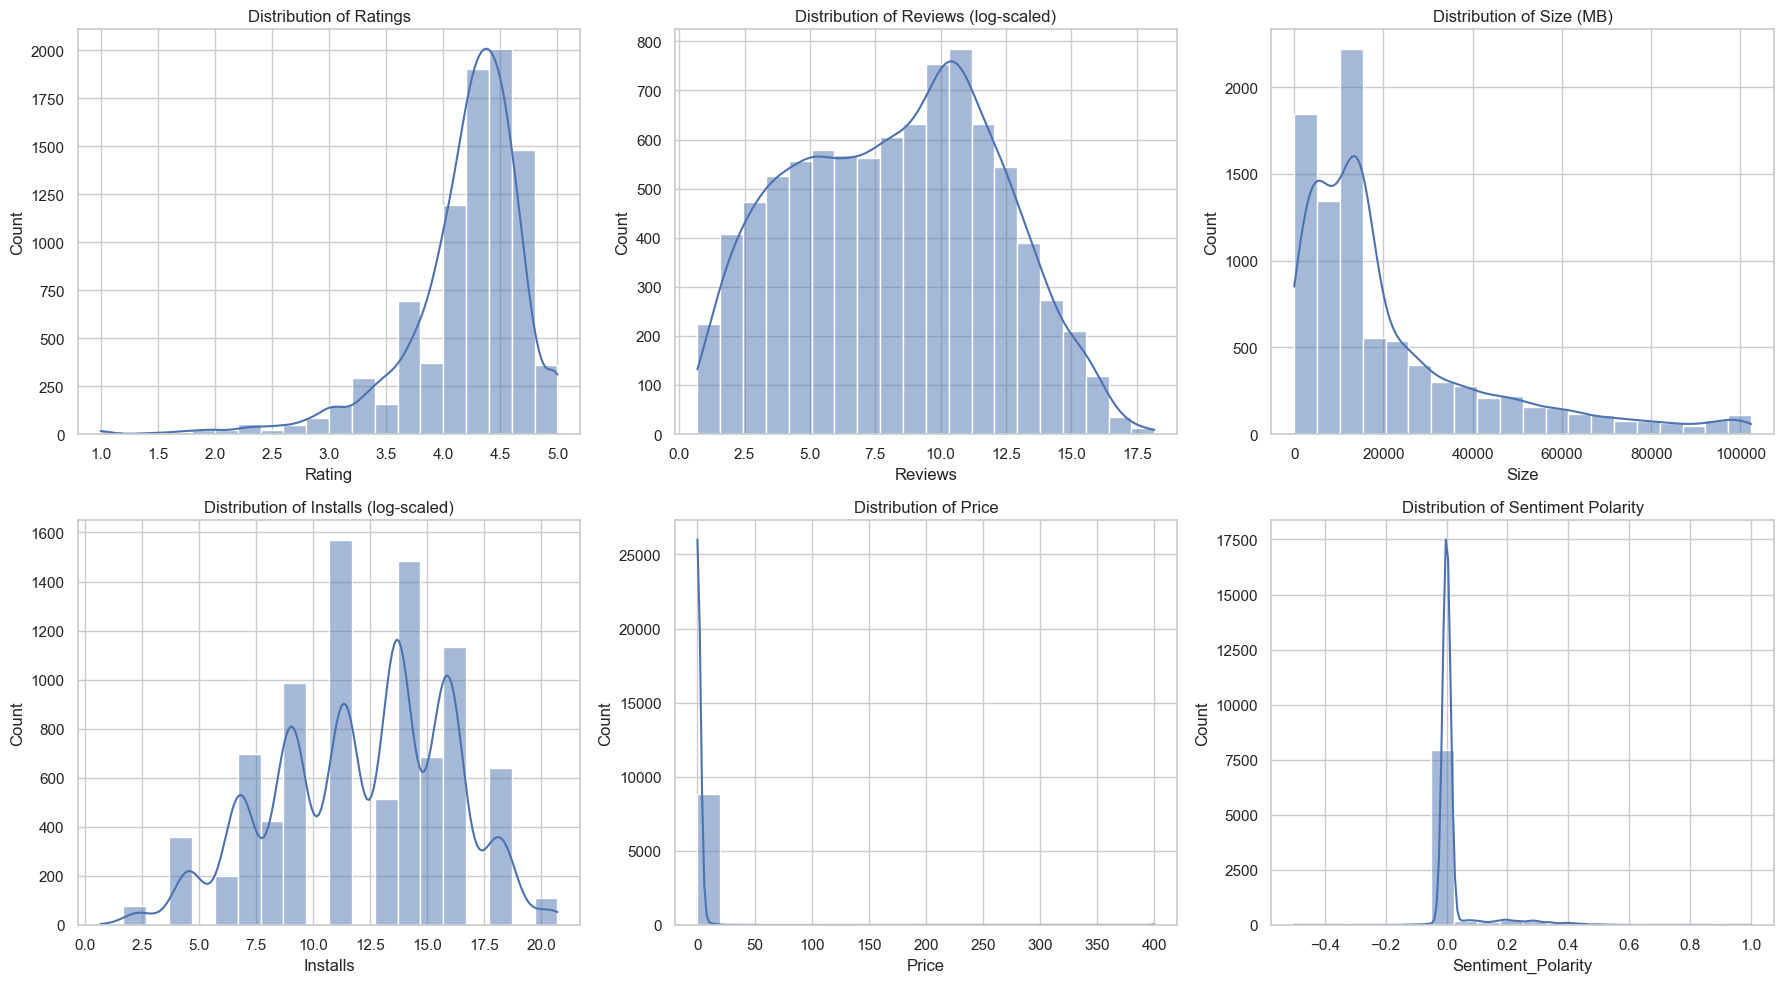

In [96]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

sns.histplot(merged_data['Rating'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Ratings')

sns.histplot(np.log1p(merged_data['Reviews']), bins=20, kde=True, ax=axes[0, 1])  # Log transform for better visualization
axes[0, 1].set_title('Distribution of Reviews (log-scaled)')


sns.histplot(merged_data['Size'], bins=20, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Size (MB)')


sns.histplot(np.log1p(merged_data['Installs']), bins=20, kde=True, ax=axes[1, 0])  # Log transform for better visualization
axes[1, 0].set_title('Distribution of Installs (log-scaled)')


sns.histplot(merged_data['Price'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Price')


sns.histplot(merged_data['Sentiment_Polarity'], bins=20, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Sentiment Polarity')

plt.tight_layout()
plt.show()

Rating: The distribution of app ratings shows a skew towards higher ratings, with most apps having a rating around 4.0 or higher.

Reviews (Log-Scaled): The number of reviews has a wide range, but most apps have a relatively low number of reviews, as indicated by the log-scale.

Size (MB): App sizes vary significantly, with a notable number of apps being relatively small in size (less than 20 MB).

Installs (Log-Scaled): Similar to reviews, the number of installs varies widely among apps, with many apps having a lower number of installs.

Price: The majority of apps are free or have a very low price, as indicated by the concentration at the lower end of the scale.

Sentiment Polarity: The sentiment polarity of reviews tends towards neutral (around 0), with a spread of both positive and negative sentiments.

# BI Variate Analysis

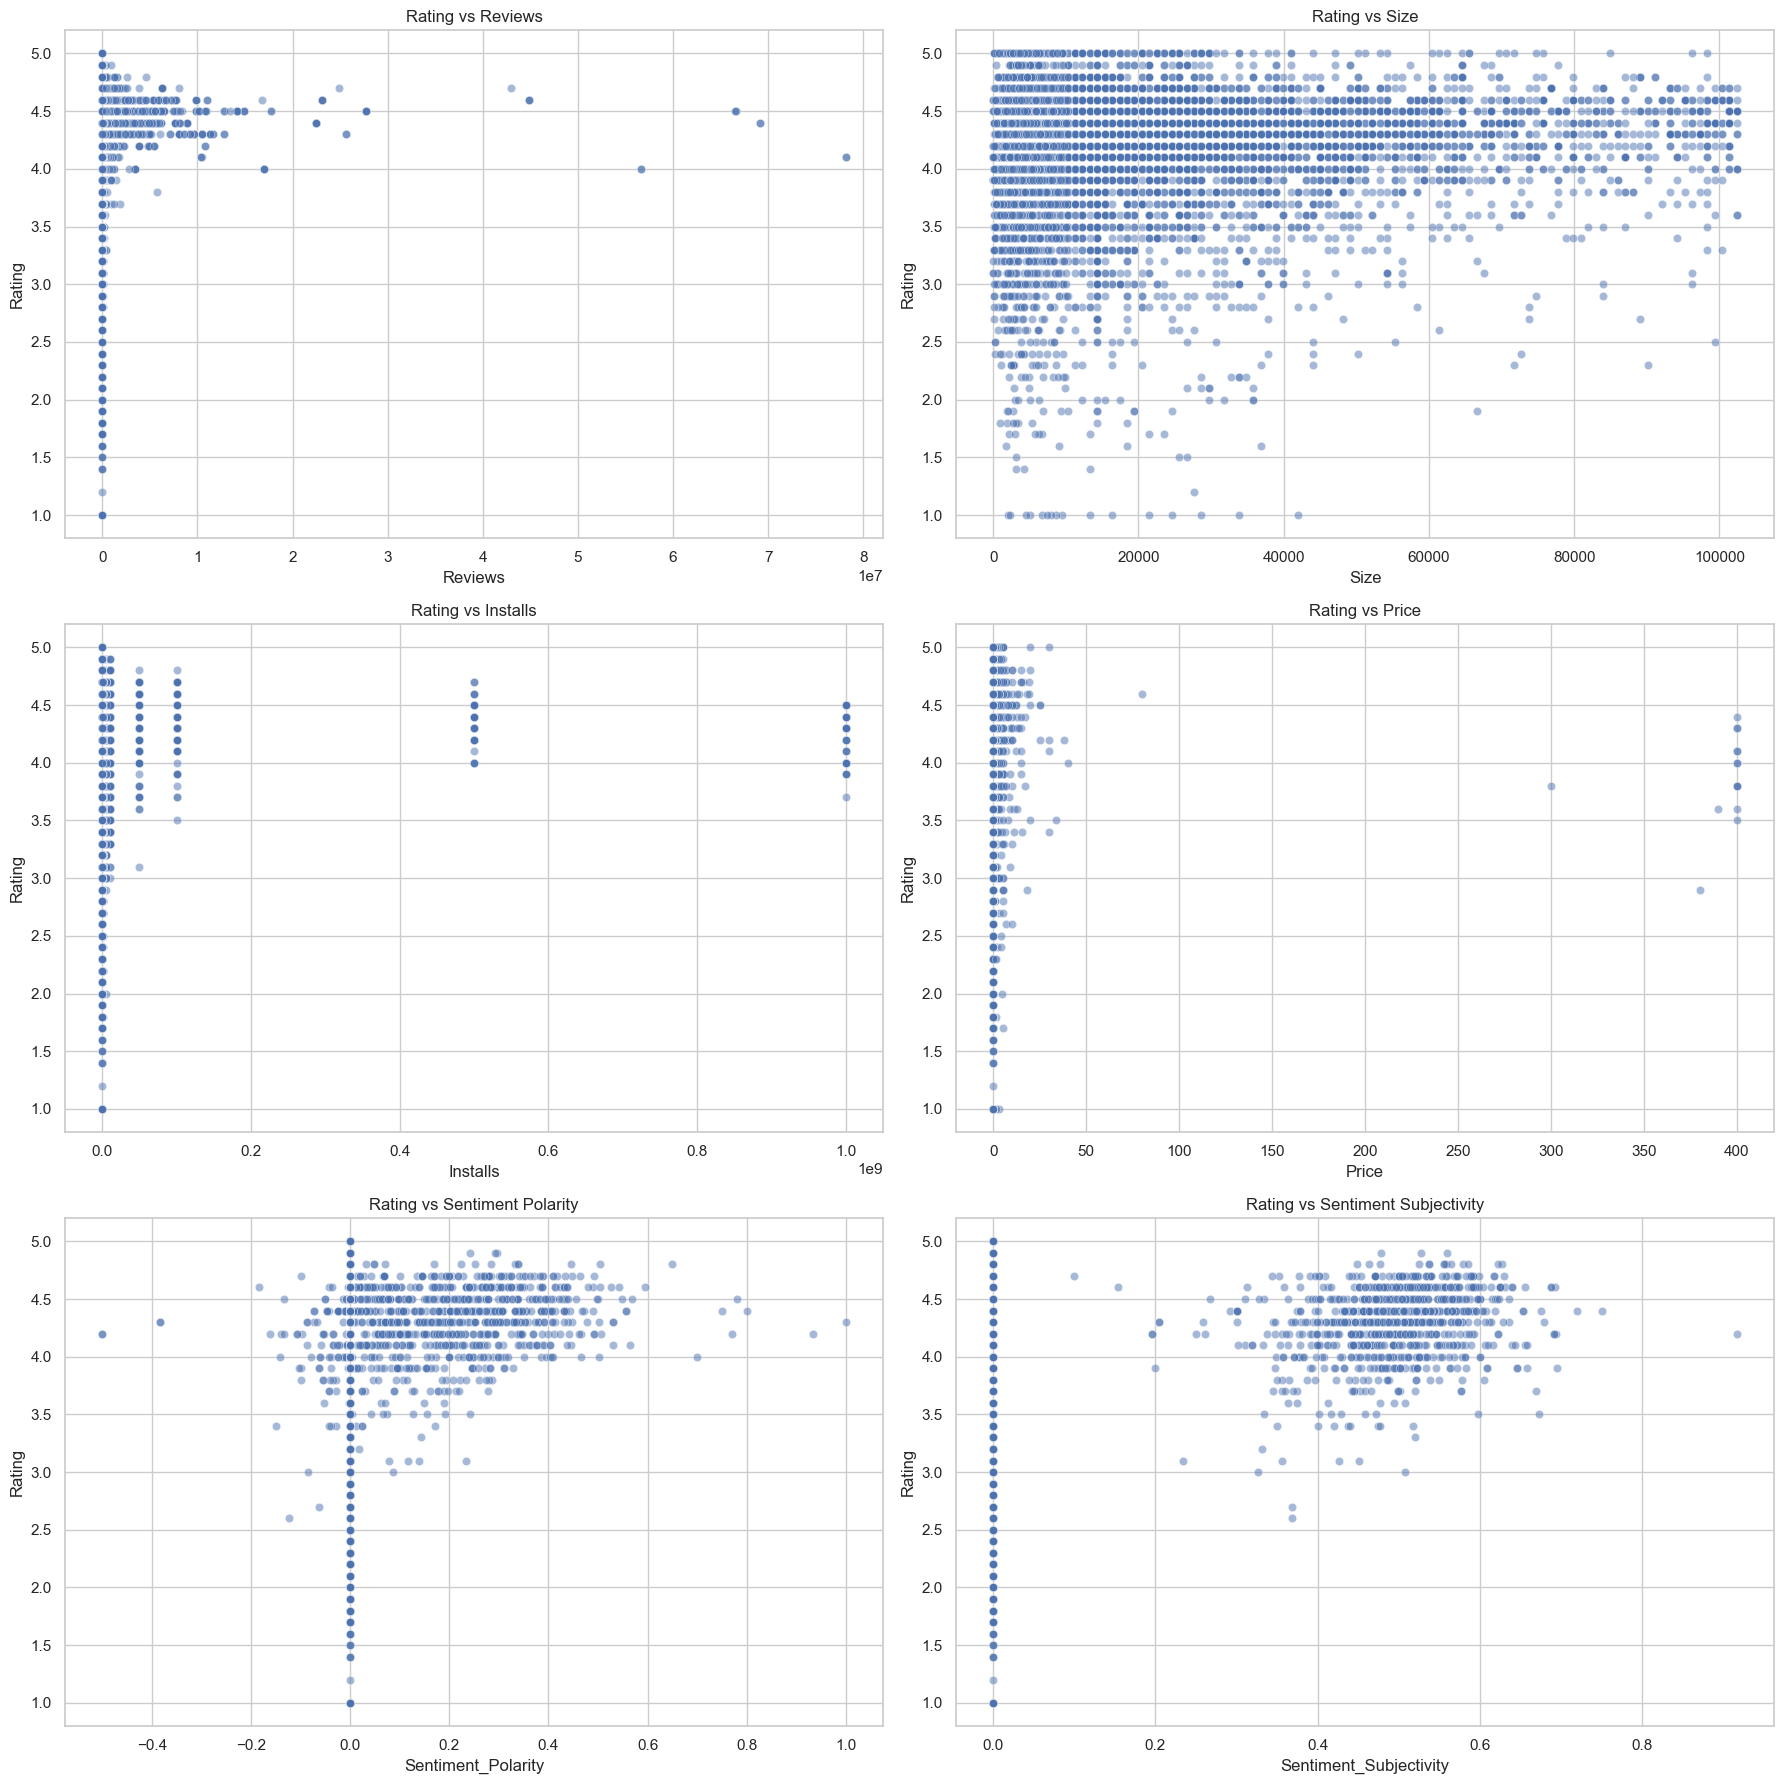

In [100]:
# Bivariate Analysis: Examining relationships between 'Rating' and other key variables

# Plotting scatter plots of 'Rating' vs other variables
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

# Rating vs Reviews
sns.scatterplot(x='Reviews', y='Rating', data=merged_data, ax=axes[0, 0], alpha=0.5)
axes[0, 0].set_title('Rating vs Reviews')

# Rating vs Size
sns.scatterplot(x='Size', y='Rating', data=merged_data, ax=axes[0, 1], alpha=0.5)
axes[0, 1].set_title('Rating vs Size')

# Rating vs Installs
sns.scatterplot(x='Installs', y='Rating', data=merged_data, ax=axes[1, 0], alpha=0.5)
axes[1, 0].set_title('Rating vs Installs')

# Rating vs Price
sns.scatterplot(x='Price', y='Rating', data=merged_data, ax=axes[1, 1], alpha=0.5)
axes[1, 1].set_title('Rating vs Price')

# Rating vs Sentiment Polarity
sns.scatterplot(x='Sentiment_Polarity', y='Rating', data=merged_data, ax=axes[2, 0], alpha=0.5)
axes[2, 0].set_title('Rating vs Sentiment Polarity')

# Rating vs Sentiment Subjectivity
sns.scatterplot(x='Sentiment_Subjectivity', y='Rating', data=merged_data, ax=axes[2, 1], alpha=0.5)
axes[2, 1].set_title('Rating vs Sentiment Subjectivity')

plt.tight_layout()
plt.show()


Rating vs Reviews: There appears to be a slight positive correlation between the number of reviews and ratings, suggesting that apps with more reviews might have higher ratings.

Rating vs Size: The relationship between app size and ratings is not very clear, indicating that size might not be a strong predictor of app ratings.

Rating vs Installs: Similar to reviews, there seems to be a slight positive correlation with installs, but the relationship is not strongly defined.

Rating vs Price: Most of the higher-rated apps are free or low-cost, with fewer high-rated apps having a high price. However, the relationship is not strongly linear.

Rating vs Sentiment Polarity: There's a spread of sentiment polarity across different ratings, with no clear trend indicating a strong correlation.

Rating vs Sentiment Subjectivity: Like sentiment polarity, sentiment subjectivity does not show a clear pattern in relation to app ratings.

**Correlation Heatmap**

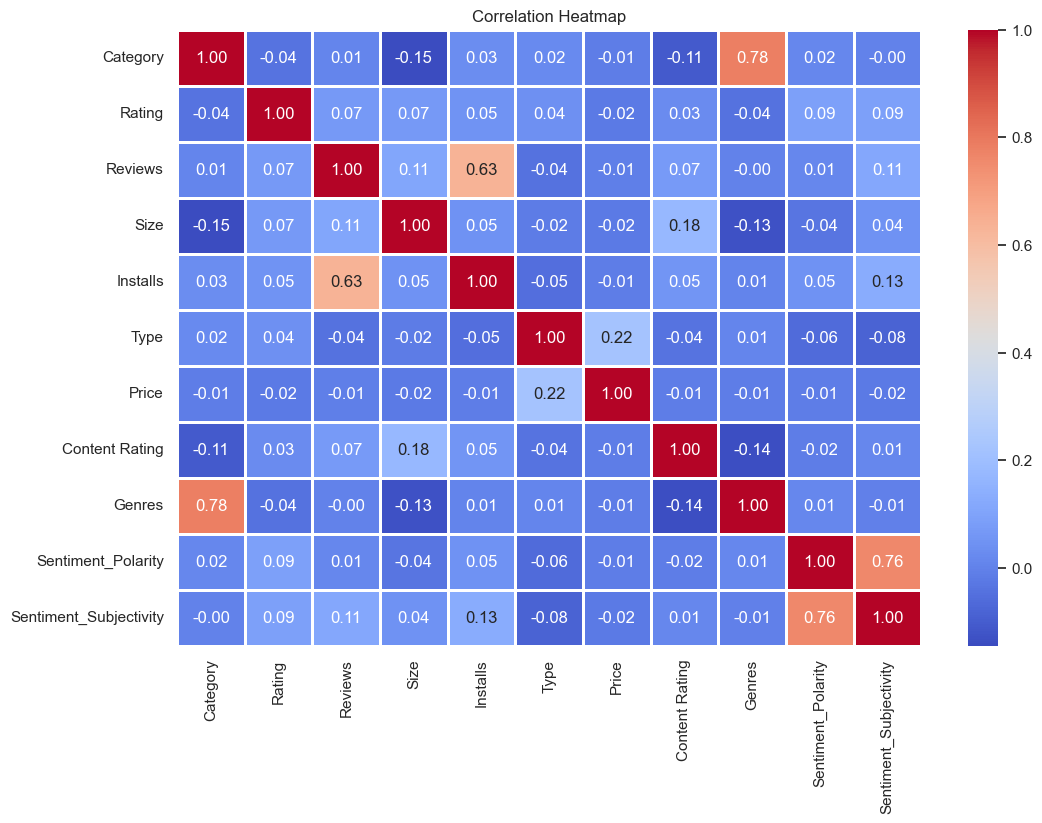

In [102]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = merged_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap")
plt.show()


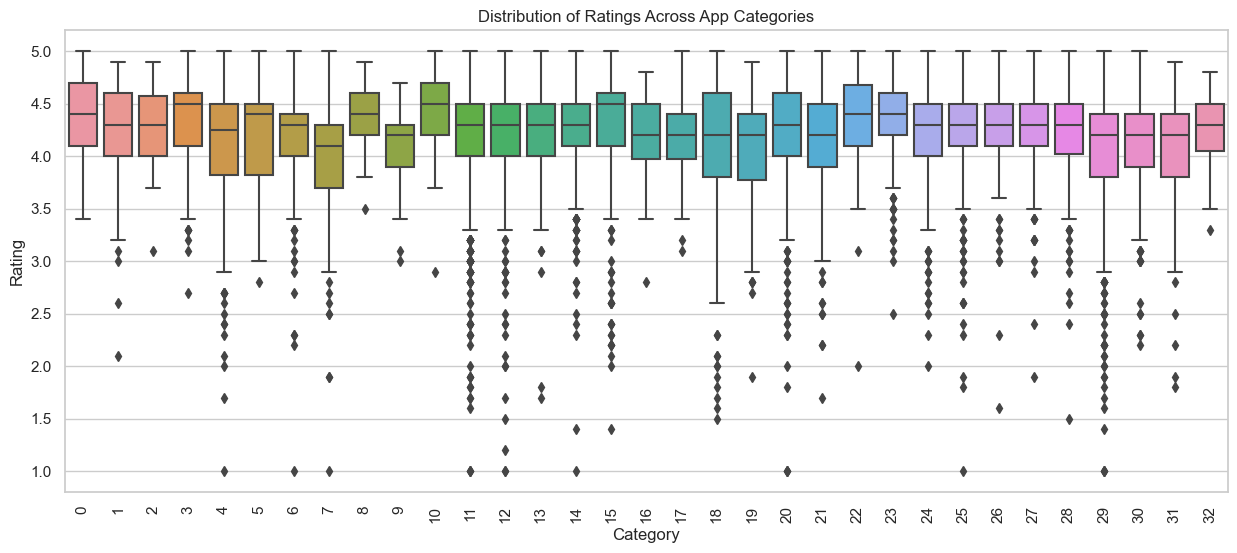

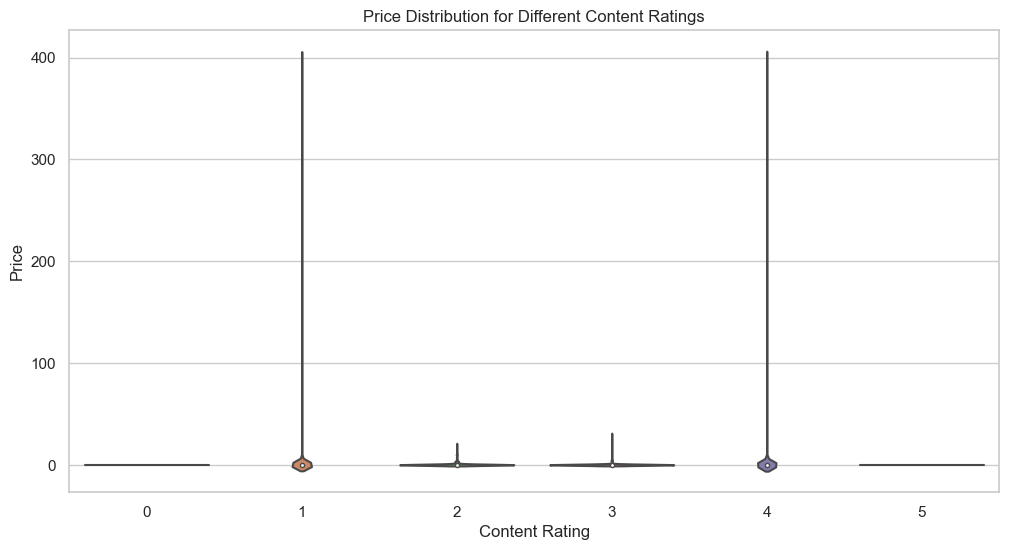

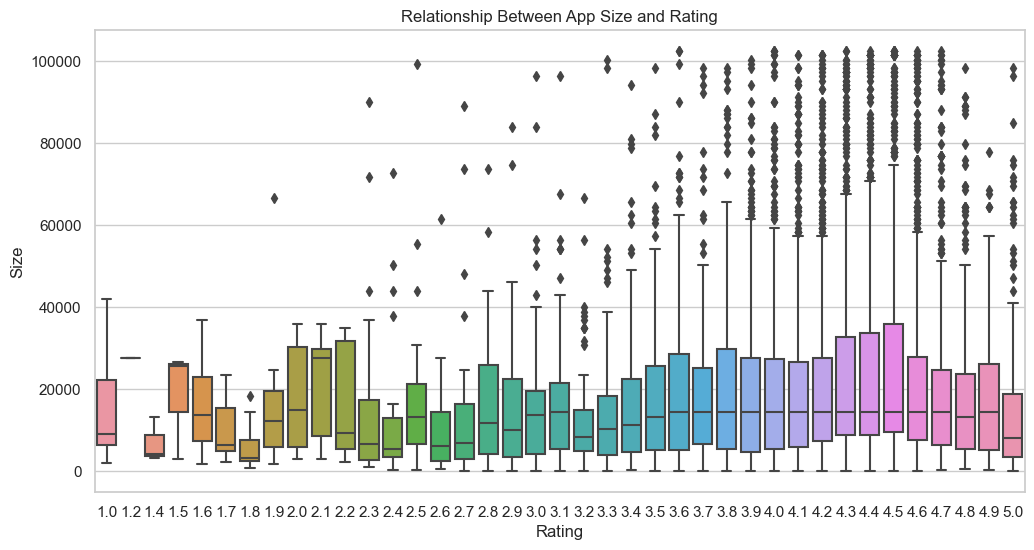

In [103]:

plt.figure(figsize=(15, 6))
sns.boxplot(x='Category', y='Rating', data=merged_data)
plt.xticks(rotation=90)
plt.title("Distribution of Ratings Across App Categories")
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Content Rating', y='Price', data=merged_data)
plt.title("Price Distribution for Different Content Ratings")
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='Rating', y='Size', data=merged_data)
plt.title("Relationship Between App Size and Rating")
plt.show()


# Findings
1. Most apps have median rating of 4.0
2. Most of the apps are free
3. Median Size remains same with change in Rating
4. Larger size of app do not necessarily corelate with High Rating

# Linear Regression Model

In [105]:
from sklearn.model_selection import train_test_split

# Features and Labels Segregation
X = merged_data.drop(['App', 'Rating', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)
y = merged_data['Rating']

# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((7108, 10), (1778, 10), (7108,), (1778,))

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Training the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predicting the ratings on the test set
y_pred = linear_reg.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

(mae, mse, rmse)


(0.3631129110957614, 0.26888502461244873, 0.5185412467802815)

The MAE tells us that, on average, the model's predictions are about 0.393 units away from the actual app ratings.

The MSE, being a bit higher, indicates a higher penalty for large errors, as it squares the errors before averaging.

The RMSE, which is the square root of MSE, is usually more interpretable as it's on the same scale as the target variable. An RMSE of 0.557 suggests that the typical error made by the model is around 0.557 rating points.

# Effect of Scaling

In [109]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the Linear Regression model on the scaled data
linear_reg_scaled = LinearRegression()
linear_reg_scaled.fit(X_train_scaled, y_train)

# Predicting the ratings on the scaled test set
y_pred_scaled = linear_reg_scaled.predict(X_test_scaled)

# Evaluating the model on the scaled data
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

(mae_scaled, mse_scaled, rmse_scaled)


(0.3631129110957611, 0.26888502461244873, 0.5185412467802815)

These results are essentially the same as those obtained without feature scaling. In the case of Linear Regression, especially when the features are not extremely varied in scale, scaling may not have a significant impact on the model's performance. 

# Cross Val Score

In [110]:
from sklearn.model_selection import cross_val_score

k = 5  # Number of folds
cv_scores = cross_val_score(linear_reg, X_train_scaled, y_train, cv=k, scoring='neg_mean_squared_error')

rmse_cv = np.sqrt(-cv_scores)


rmse_cv_mean = np.mean(rmse_cv)
rmse_cv_std = np.std(rmse_cv)
(rmse_cv_mean, rmse_cv_std)


(0.5166086049373251, 0.02237268487519535)

Mean RMSE remained 0.5166 with Standard Deviation of 0.22
The model is fairly consistent

# Performance with Lasso,Ridge Regression

In [113]:
from sklearn.linear_model import Ridge, Lasso

# Initializing the models
ridge_reg = Ridge(random_state=42)
lasso_reg = Lasso(random_state=42)


# Training and evaluating each model
models = [ridge_reg, lasso_reg]
model_names = ['Ridge Regression', 'Lasso Regression']
results = {}

for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

results


{'Ridge Regression': {'MAE': 0.36311281219867725,
  'MSE': 0.26888525613256725,
  'RMSE': 0.5185414700219909},
 'Lasso Regression': {'MAE': 0.3681165979744937,
  'MSE': 0.2753363282407254,
  'RMSE': 0.5247250024924727}}

The model results were Fairly Same As of Linear Regression

# Performance with SVR and Random Forest Regressor

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Initializing the models
random_forest_reg = RandomForestRegressor(random_state=42)
svr = SVR()

# Training and evaluating each model
models = [ random_forest_reg, svr]
model_names = ['Random Forest Regressor', 'Support Vector Regressor']
results = {}

for model, name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

results


{'Random Forest Regressor': {'MAE': 0.33065063742032247,
  'MSE': 0.24687323761998498,
  'RMSE': 0.49686339935638746},
 'Support Vector Regressor': {'MAE': 0.3417390587614057,
  'MSE': 0.2676078734747266,
  'RMSE': 0.517308296352114}}

The Random Forest Regressor shows the best performance among the models, with the lowest values in all three metrics (MAE, MSE, RMSE). This suggests that the Random Forest, a non-linear and ensemble-based method, is more effective for this particular dataset, likely due to its ability to capture complex patterns and relationships in the data.

# Insights for Stakeholders

App Ratings and Reviews:

Apps with more reviews tend to have higher ratings. More User engagement means better Ratings

Influence of App Size and Price:

Larger app sizes and higher prices do not necessarily correlate with higher app ratings. User experience  may play more critical roles.

Sentiment Analysis:
Sentiment polarity from user reviews shows a weak correlation with app ratings. 

Model Performance:
The Random Forest Regressor showed the best performance among the models tested, indicating that the dataset likely contains complex, non-linear relationships.

# Recommendations

Focus on User Engagement:

Encourage users to leave reviews. Higher engagement can lead to better ratings

Optimize App Size and Pricing:
Keep app sizes manageable, and be mindful of pricing strategies. Focus on optimizing user experience rather than just adding more features.

Regular Updates and Improvements:
Regularly update apps, addressing user feedback. Keeping an app up-to-date can positively influence user perception and ratings.

Utilize Sentiment Analysis:
Regularly analyze user reviews for sentiment. This can provide insights into user needs and areas for improvement that might not be evident through ratings alone.